# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('Gram.csv', index_col = 'Date', parse_dates=True)

In [6]:
df

,Price
Date,
2021-06-01,65.0
2021-06-02,65.0
2021-06-03,65.0
2021-06-04,65.0
2021-06-05,65.0
...,...
2022-11-26,82.5
2022-11-27,82.5
2022-11-28,82.5


In [7]:
df.dropna()

,Price
Date,
2021-06-01,65.0
2021-06-02,65.0
2021-06-03,65.0
2021-06-04,65.0
2021-06-05,65.0
...,...
2022-11-26,82.5
2022-11-27,82.5
2022-11-28,82.5


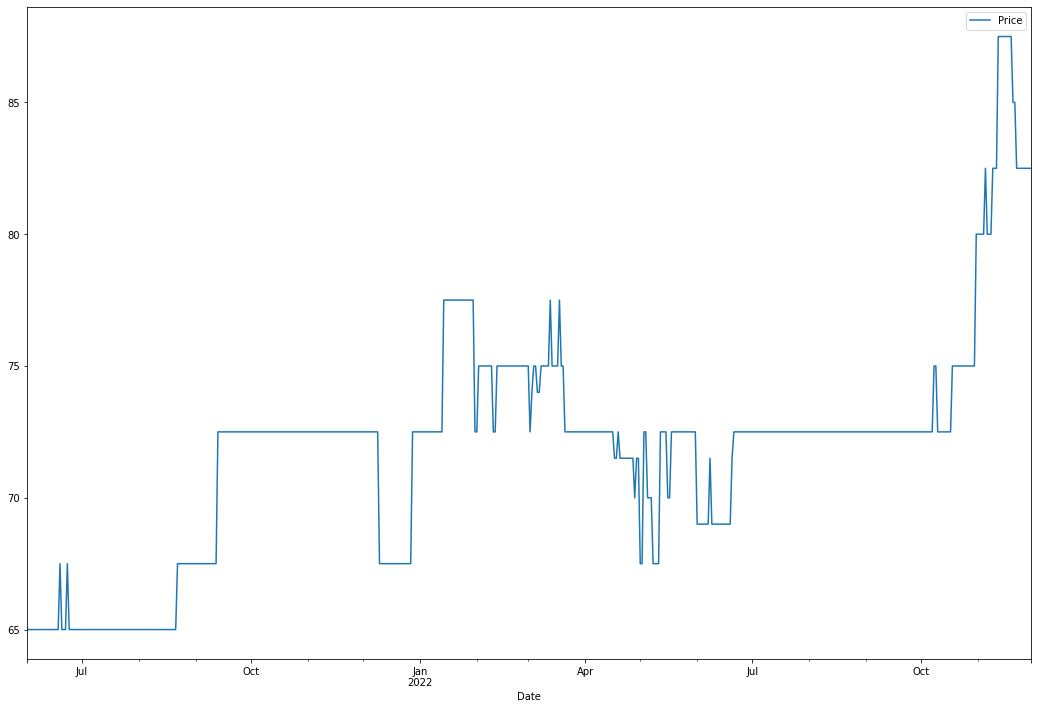

In [8]:
df.plot(figsize = (18, 12));

In [9]:
results = seasonal_decompose(df['Price'], model = 'addtive')

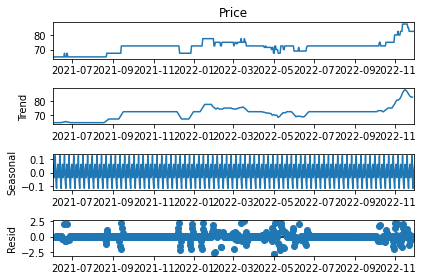

In [10]:
results.plot();

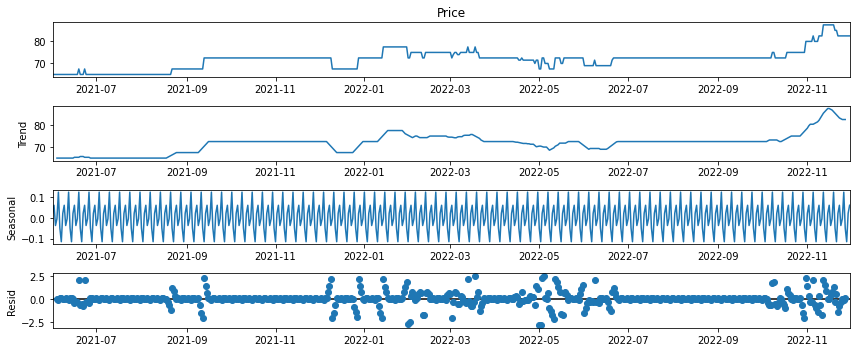

In [11]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

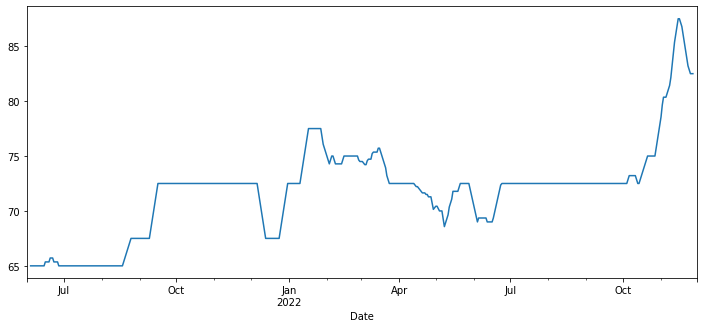

In [12]:
results.trend.plot()

In [13]:
df.index.freq = 'D'

In [14]:
df.head()

,Price
Date,
2021-06-01,65.0
2021-06-02,65.0
2021-06-03,65.0
2021-06-04,65.0
2021-06-05,65.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [16]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [17]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [18]:
test_predictions = fitted_model.forecast(49)

In [19]:
test_predictions

2022-10-14    72.552758
2022-10-15    72.552802
2022-10-16    72.927803
2022-10-17    72.552809
2022-10-18    72.709048
2022-10-19    72.771554
2022-10-20    72.771546
2022-10-21    72.771551
2022-10-22    72.771567
2022-10-23    72.771561
2022-10-24    73.083339
2022-10-25    72.995114
2022-10-26    73.083333
2022-10-27    73.083344
2022-10-28    72.406908
2022-10-29    72.289263
2022-10-30    72.789249
2022-10-31    72.789271
2022-11-01    72.583399
2022-11-02    72.583398
2022-11-03    72.642226
2022-11-04    72.495163
2022-11-05    72.348075
2022-11-06    72.201061
2022-11-07    72.495153
2022-11-08    72.936372
2022-11-09    72.789256
2022-11-10    73.083430
2022-11-11    73.230475
2022-11-12    72.936390
2022-11-13    73.027713
2022-11-14    73.027757
2022-11-15    73.402758
2022-11-16    73.027764
2022-11-17    73.184003
2022-11-18    73.246509
2022-11-19    73.246501
2022-11-20    73.246506
2022-11-21    73.246522
2022-11-22    73.246516
2022-11-23    73.558294
2022-11-24    73

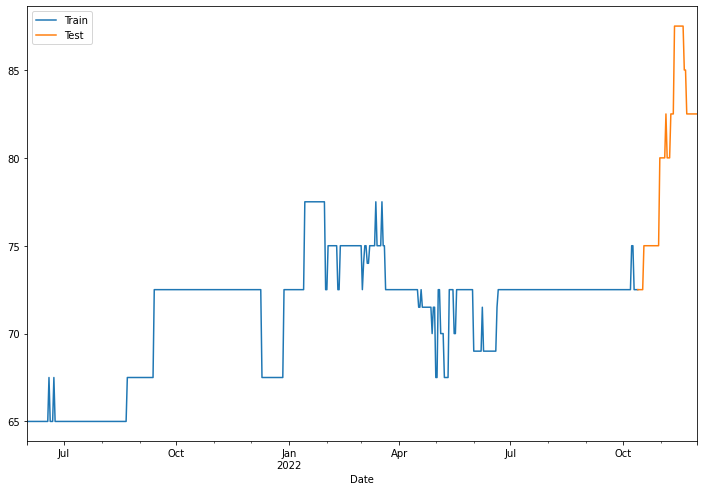

In [20]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [21]:
test_data.describe()

,Price
count,49.00000
mean,80.00000
std,4.97389
min,72.50000
25%,75.00000
50%,80.00000
75%,82.50000
max,87.50000


In [22]:
mean_absolute_error(test_data,test_predictions)


7.108425615965014

In [23]:
mean_squared_error(test_data, test_predictions)

72.64383953601259

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
rmse(test_data, test_predictions)

array([8.92726737, 8.92723111, 8.61688235, 8.92722537, 8.79731075,
       8.7455774 , 8.74558386, 8.74558027, 8.74556653, 8.74557188,
       8.48969373, 8.56172427, 8.48969812, 8.48968927, 9.04929535,
       9.1482324 , 8.73095753, 8.73093962, 8.90172259, 8.90172336,
       8.85276957, 8.97537037, 9.09871694, 9.22269685, 8.97537871,
       8.60985138, 8.73095199, 8.48961911, 8.37025427, 8.60983663,
       8.53507312, 8.53503761, 8.23154244, 8.53503199, 8.40788368,
       8.35729209, 8.3572984 , 8.35729489, 8.35728146, 8.35728668,
       8.10742091, 8.17769473, 8.10742519, 8.10741656, 8.65462719,
       8.75164155, 8.34299917, 8.34298166, 8.51006119])

In [26]:
np.sqrt(mean_squared_error(test_data, test_predictions))

8.523135546030732

In [27]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [28]:
forecast_predictions = final_model.forecast(60)

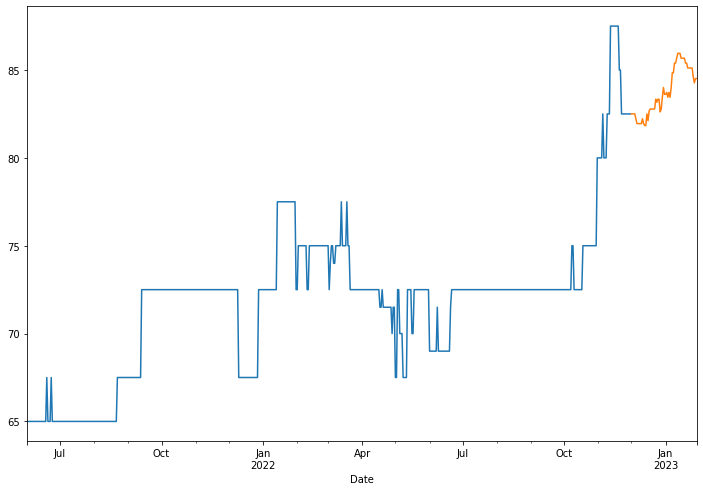

In [29]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [30]:

forecast_predictions

2022-12-01    82.504587
2022-12-02    82.504533
2022-12-03    82.504503
2022-12-04    82.504448
2022-12-05    82.226652
2022-12-06    81.948826
2022-12-07    81.948788
2022-12-08    81.948779
2022-12-09    81.948707
2022-12-10    81.948683
2022-12-11    82.226423
2022-12-12    81.948613
2022-12-13    81.837483
2022-12-14    81.837438
2022-12-15    82.504078
2022-12-16    82.115192
2022-12-17    82.670699
2022-12-18    82.781823
2022-12-19    82.781799
2022-12-20    82.781795
2022-12-21    82.781771
2022-12-22    82.781750
2022-12-23    83.337303
2022-12-24    83.170645
2022-12-25    83.337310
2022-12-26    83.337333
2022-12-27    82.615147
2022-12-28    82.781841
2022-12-29    83.448544
2022-12-30    84.004151
2022-12-31    83.615308
2023-01-01    83.615354
2023-01-02    83.726491
2023-01-03    83.448777
2023-01-04    83.726594
2023-01-05    83.448832
2023-01-06    84.004438
2023-01-07    84.837798
2023-01-08    84.837811
2023-01-09    85.393429
2023-01-10    85.393423
2023-01-11    85

# *SARIMAX*

In [31]:
from datetime import datetime

In [32]:
df_KN = pd.read_csv('Gram.csv', index_col = 'Date', parse_dates = True)

In [33]:
df_KN.index.freq ='D'

In [34]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [35]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adf_test(df_KN['Price'])

ADF Statistics: -1.4689121316667444
p- value: 0.5488302072192782
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [38]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,65.0,NaN
2021-06-02,65.0,0.0
2021-06-03,65.0,0.0
2021-06-04,65.0,0.0
2021-06-05,65.0,0.0


In [39]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -1.4689121316667444
p- value: 0.5488302072192782
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [41]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.872497467808332
p- value: 1.3572971070193768e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [42]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [43]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -3.1679344499576687
p- value: 0.021917416477235763
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


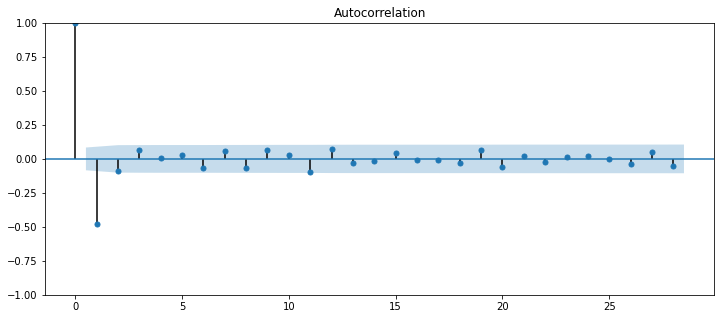

In [44]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

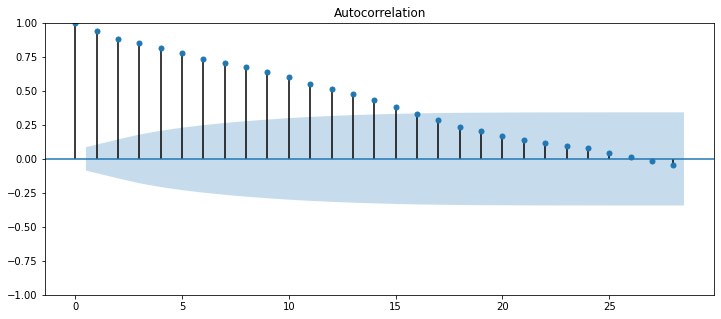

In [45]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

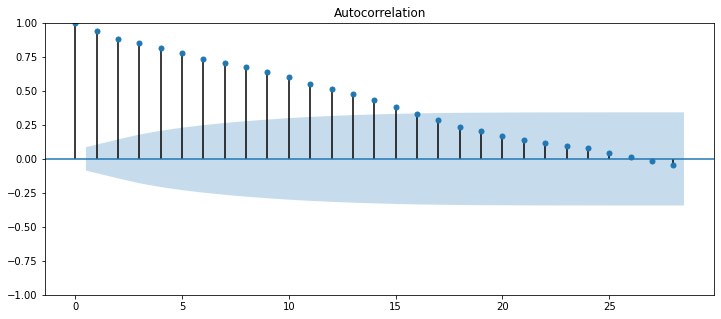

In [46]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

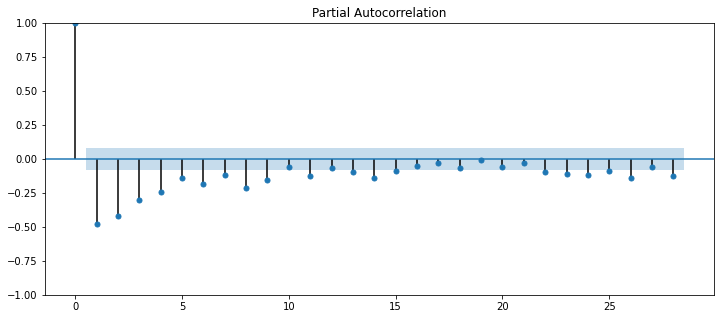

In [47]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [48]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [49]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [50]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [51]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,72.5,0.0,0.0,0.0
2022-10-03,72.5,0.0,0.0,0.0
2022-10-04,72.5,0.0,0.0,0.0
2022-10-05,72.5,0.0,0.0,0.0
2022-10-06,72.5,0.0,0.0,0.0
2022-10-07,72.5,0.0,0.0,0.0
2022-10-08,75.0,2.5,2.5,2.5
2022-10-09,75.0,0.0,-2.5,2.5
2022-10-10,72.5,-2.5,-2.5,0.0


In [52]:
import statsmodels.api as sm

In [53]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from pmdarima import ARIMA

In [57]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,65.0,NaN,NaN,NaN
2021-06-02,65.0,0.0,NaN,NaN
2021-06-03,65.0,0.0,0.0,NaN
2021-06-04,65.0,0.0,0.0,NaN
2021-06-05,65.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,72.5,0.0,0.0,0.0
2022-09-28,72.5,0.0,0.0,0.0
2022-09-29,72.5,0.0,0.0,0.0


In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [60]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [61]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood                -713.931
Date:                             Fri, 06 Jan 2023   AIC                           1445.862
Time:                                     21:56:40   BIC                           1483.004
Sample:                                 06-01-2021   HQIC                          1460.490
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5071      1.029      1.465      0.143      -0.509       3.523
ar.L2         -0.1456      1.970     -0.074      0.941      -4.008       3.716
ar.L3         -0.3717      0.950     -0.391      0.696      -2.233       1.490
ma.L1         -0.6508      1.026     -0.635      0.526      -2.661       1.359
ma.L2         -0.5062      1.097     -0.461      0.645      -2.657       1.644
ma.L3          0.1432      0.109      1.317      0.188      -0.070       0.356
ma.L4          0.0663      0.215      0.309      0.757      -0.355       0.487
ma.L5          0.0498      0.046      1.085      0.278      -0.040       0.140
sigma2         1.3167      0.047     28.027      0.000       1.225       1.409
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1201.71
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [63]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

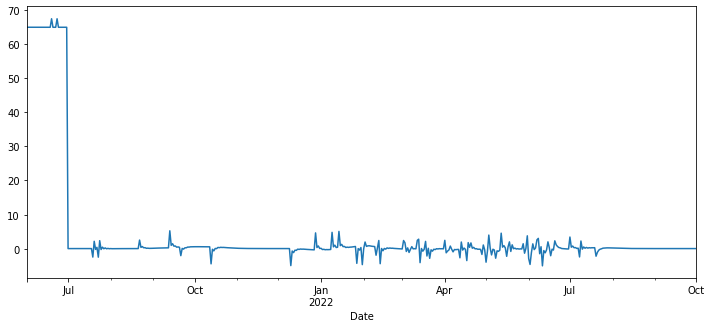

In [64]:
model_SARIMAX_fit.resid.plot()

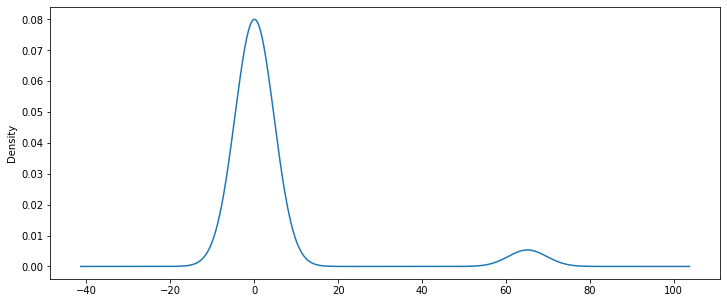

In [65]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [66]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [67]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,72.5,0.0,0.0,0.0,72.499996
2022-10-03,72.5,0.0,0.0,0.0,72.499993
2022-10-04,72.5,0.0,0.0,0.0,72.499992
2022-10-05,72.5,0.0,0.0,0.0,72.499991
2022-10-06,72.5,0.0,0.0,0.0,72.499990
2022-10-07,72.5,0.0,0.0,0.0,72.499990
2022-10-08,75.0,2.5,2.5,2.5,72.499989
2022-10-09,75.0,0.0,-2.5,2.5,72.499989
2022-10-10,72.5,-2.5,-2.5,0.0,72.499988


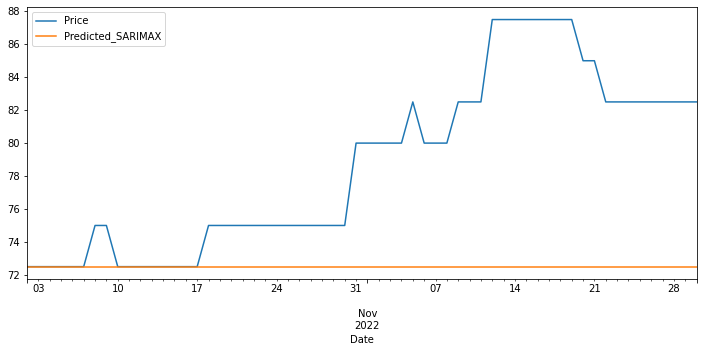

In [68]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [69]:
pred_Sarimax

2022-10-02    72.499996
2022-10-03    72.499993
2022-10-04    72.499992
2022-10-05    72.499991
2022-10-06    72.499990
2022-10-07    72.499990
2022-10-08    72.499989
2022-10-09    72.499989
2022-10-10    72.499988
2022-10-11    72.499988
2022-10-12    72.499988
2022-10-13    72.499988
2022-10-14    72.499988
2022-10-15    72.499988
2022-10-16    72.499989
2022-10-17    72.499989
2022-10-18    72.499989
2022-10-19    72.499990
2022-10-20    72.499990
2022-10-21    72.499991
2022-10-22    72.499991
2022-10-23    72.499992
2022-10-24    72.499992
2022-10-25    72.499993
2022-10-26    72.499993
2022-10-27    72.499994
2022-10-28    72.499995
2022-10-29    72.499995
2022-10-30    72.499996
2022-10-31    72.499996
2022-11-01    72.499993
2022-11-02    72.499991
2022-11-03    72.499990
2022-11-04    72.499989
2022-11-05    72.499989
2022-11-06    72.499989
2022-11-07    72.499989
2022-11-08    72.499989
2022-11-09    72.499989
2022-11-10    72.499989
2022-11-11    72.499989
2022-11-12    72

In [70]:
predicted_value_SARIMA = pred_Sarimax

In [71]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [72]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

6.208341769851486

In [73]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

65.93759945040753

In [74]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

8.120197008103162

# ***FB Prophet***

In [75]:
df_fb  = pd.read_csv('Gram.csv')

In [76]:
df_fb.columns = ['ds', 'y']

In [77]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [78]:
df_fb.head()

,ds,y
0,2021-06-01,65.0
1,2021-06-02,65.0
2,2021-06-03,65.0
3,2021-06-04,65.0
4,2021-06-05,65.0


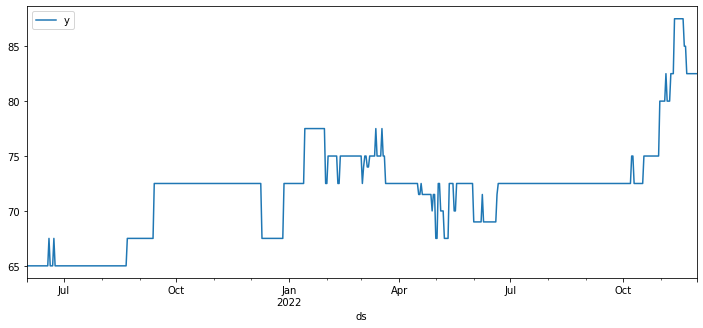

In [79]:
df_fb.plot(x='ds', y='y')

In [80]:
len(df_fb)

548

In [81]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [82]:
import prophet

In [83]:
import io, os, sys, setuptools, tokenize

In [84]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from fbprophet import Prophet

In [86]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [87]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,73.944277,70.417804,77.367690,70.726115,76.977887,0.051784,0.051784,0.051784,0.051784,0.051784,0.051784,0.0,0.0,0.0,73.996061
544,2022-11-27,73.960309,70.497492,77.368929,70.610869,77.073113,-0.041331,-0.041331,-0.041331,-0.041331,-0.041331,-0.041331,0.0,0.0,0.0,73.918979
545,2022-11-28,73.976341,70.561025,77.390246,70.518530,77.171806,-0.126955,-0.126955,-0.126955,-0.126955,-0.126955,-0.126955,0.0,0.0,0.0,73.849387
546,2022-11-29,73.992373,70.003977,77.430762,70.496440,77.310920,0.041675,0.041675,0.041675,0.041675,0.041675,0.041675,0.0,0.0,0.0,74.034048
547,2022-11-30,74.008405,70.175550,77.682591,70.471346,77.470468,0.066717,0.066717,0.066717,0.066717,0.066717,0.066717,0.0,0.0,0.0,74.075122


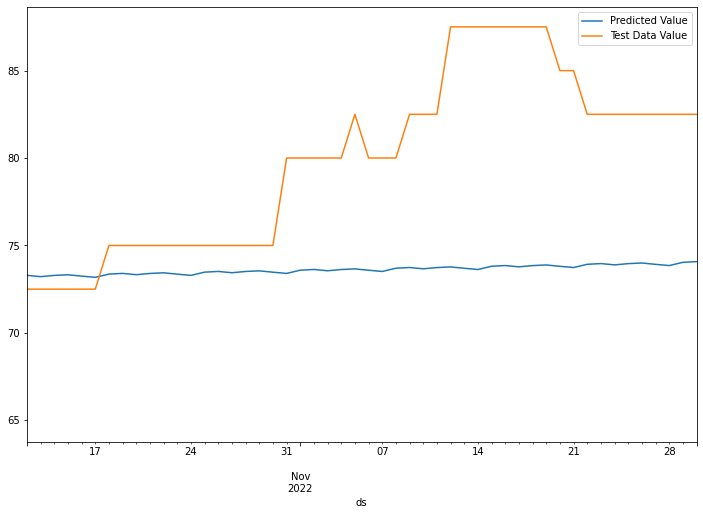

In [88]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [89]:
from statsmodels.tools.eval_measures import rmse

In [90]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [91]:
predictions_fb

488    73.021183
489    72.951591
490    73.136252
491    73.177326
492    73.103015
493    73.174410
494    73.210490
495    73.133407
496    73.063815
497    73.248477
498    73.289551
499    73.215240
500    73.286634
501    73.322714
502    73.245632
503    73.176040
504    73.360701
505    73.401775
506    73.327464
507    73.398859
508    73.434939
509    73.357856
510    73.288264
511    73.472926
512    73.514000
513    73.439689
514    73.511083
515    73.547163
516    73.470081
517    73.400489
518    73.585150
519    73.626224
520    73.551913
521    73.623308
522    73.659388
523    73.582305
524    73.512713
525    73.697375
526    73.738449
527    73.664138
528    73.735532
529    73.771612
530    73.694530
531    73.624938
532    73.809599
533    73.850673
534    73.776362
535    73.847757
536    73.883837
537    73.806754
538    73.737162
539    73.921823
540    73.962898
541    73.888587
542    73.959981
543    73.996061
544    73.918979
545    73.849387
546    74.0340

In [92]:
test_fb

,ds,y
488,2022-10-02,72.5
489,2022-10-03,72.5
490,2022-10-04,72.5
491,2022-10-05,72.5
492,2022-10-06,72.5
493,2022-10-07,72.5
494,2022-10-08,75.0
495,2022-10-09,75.0
496,2022-10-10,72.5
497,2022-10-11,72.5


In [93]:
mean_absolute_error(test_fb['y'], predictions_fb)

5.487601545651998

In [94]:
mean_squared_error(test_fb['y'], predictions_fb)

51.67369553179933

In [95]:
rmse(predictions_fb, test_fb['y'])

7.188441801378052

In [96]:
test_fb.mean()

y    78.708333
dtype: float64

In [97]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [98]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [99]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,72.662934,71.074889,74.197913,72.5,2022-08-02
1,2022-08-04,72.591997,71.097478,74.141160,72.5,2022-08-02
2,2022-08-05,72.679871,71.022587,74.276405,72.5,2022-08-02
3,2022-08-06,72.727957,71.240020,74.223689,72.5,2022-08-02
4,2022-08-07,72.638888,71.124504,74.263337,72.5,2022-08-02


In [101]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.023752,0.154118,0.144009,0.001986,0.002082,1.0
1,7 days,0.032311,0.179754,0.163371,0.002253,0.002198,1.0
2,8 days,0.049784,0.223123,0.204138,0.002816,0.002813,1.0
3,9 days,0.056154,0.236969,0.218437,0.003013,0.003404,1.0
4,10 days,0.068325,0.261390,0.239366,0.003302,0.003757,1.0
5,11 days,0.091993,0.303303,0.283155,0.003906,0.004246,1.0
6,12 days,0.107625,0.328063,0.324846,0.004481,0.004477,1.0
7,13 days,0.103930,0.322381,0.317673,0.004382,0.004477,1.0
8,14 days,0.119214,0.345274,0.337035,0.004649,0.004594,1.0
9,15 days,0.150846,0.388389,0.377802,0.005211,0.005208,1.0


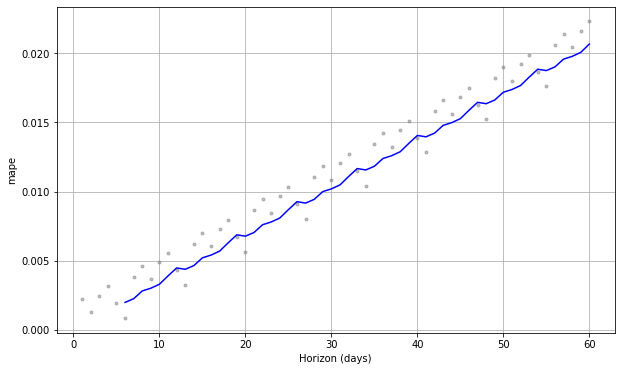

In [102]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [103]:
df_t = pd.read_csv('Gram.csv')

In [104]:
df_t.columns = ['ds', 'y']

In [105]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [106]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [107]:
t.fit(df_t)

In [108]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

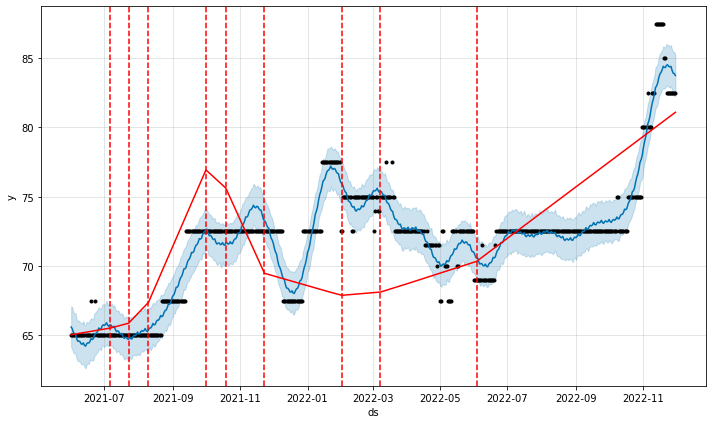

In [109]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [110]:
df_S = pd.read_csv('Gram.csv')

In [111]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


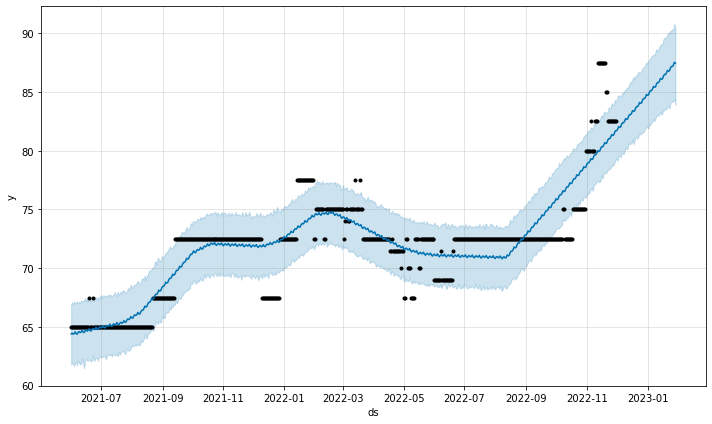

In [112]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

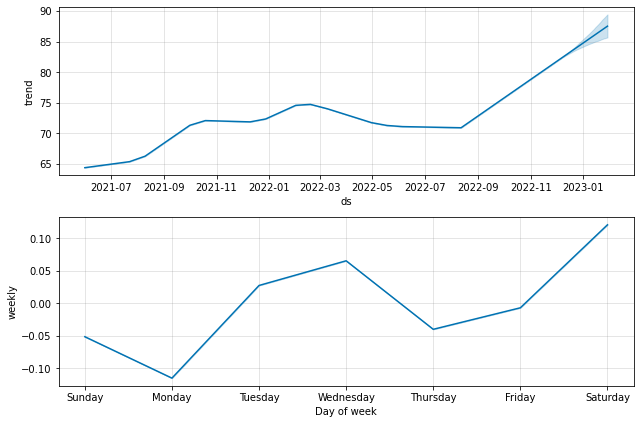

In [113]:
figure = S.plot_components(forecast);

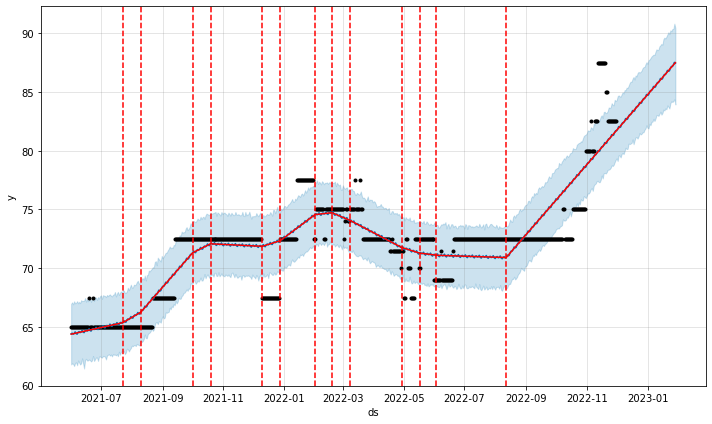

In [114]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


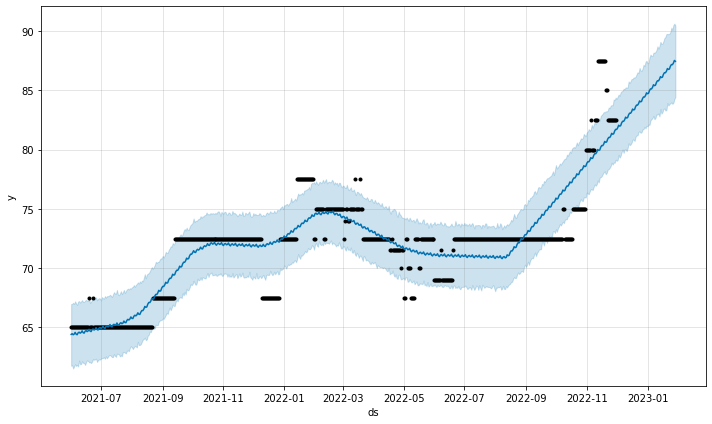

In [115]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

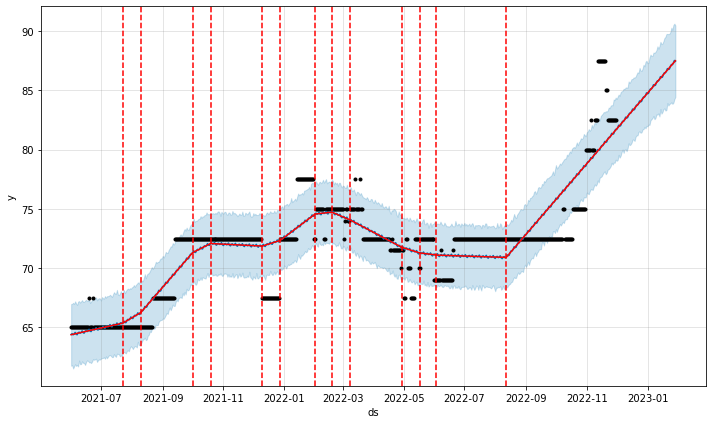

In [116]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

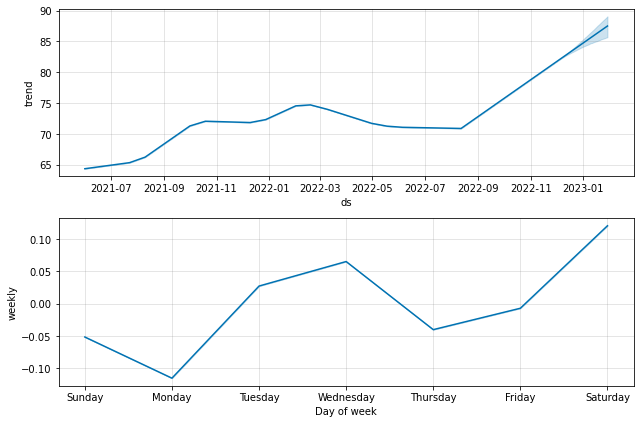

In [117]:
figure = S.plot_components(forecast)

# ***LSTM***

In [118]:
df_LSTM=pd.read_csv("Gram.csv",parse_dates=["Date"],index_col=[0])

In [119]:
print(df_LSTM.index.freq)

None


In [120]:
test_split=round(len(df_LSTM)*0.20)

In [121]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [122]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [123]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [124]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [125]:
df_for_training_scaled

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.2 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.2 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.

In [126]:
df_for_training_scaled.shape

(438, 1)

In [127]:
df_for_testing_scaled.shape

(110, 1)

In [128]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [129]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [130]:
trainX.shape

(408, 30, 1)

In [131]:
testX,testY=createXY(df_for_testing_scaled,30)

In [132]:
trainX[0]

array([[0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.2],
       [0. ],
       [0. ],
       [0. ],
       [0.2],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ]])

In [133]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [134]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [135]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]]

trainY[0]--  0.0


In [136]:
trainY[0]

0.0

In [137]:
trainY.shape

(408,)

In [138]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [139]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 8s 241ms/step - loss: 0.0761 - val_loss: 0.1131
Epoch 2/32
13/13 [==============================] - 1s 53ms/step - loss: 0.0238 - val_loss: 0.0810
Epoch 3/32
13/13 [==============================] - 1s 64ms/step - loss: 0.0192 - val_loss: 0.1082
Epoch 4/32
13/13 [==============================] - 1s 52ms/step - loss: 0.0169 - val_loss: 0.0757
Epoch 5/32
13/13 [==============================] - 1s 74ms/step - loss: 0.0152 - val_loss: 0.0728
Epoch 6/32
13/13 [==============================] - 1s 77ms/step - loss: 0.0151 - val_loss: 0.0829
Epoch 7/32
13/13 [==============================] - 1s 90ms/step - loss: 0.0142 - val_loss: 0.0707
Epoch 8/32
13/13 [==============================] - 1s 86ms/step - loss: 0.0145 - val_loss: 0.0858
Epoch 9/32
13/13 [==============================] - 1s 83ms/step - loss: 0.0146 - val_loss: 0.0771
Epoch 10/32
13/13 [==============================] - 1s 106ms/step - loss: 0.0153 - val_loss: 0.0522
Epoch 1

In [141]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}

In [142]:
my_model=grid_search.best_estimator_.model

In [143]:
my_model

In [144]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 10ms/step


In [145]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.598816  ]
 [0.74113244]
 [0.7690925 ]
 [0.6305004 ]
 [0.610147  ]
 [0.6045596 ]
 [0.6027666 ]
 [0.60184485]
 [0.6010392 ]
 [0.6002611 ]
 [0.599567  ]
 [0.74138284]
 [0.768773  ]
 [0.7747323 ]
 [0.777147  ]
 [0.7788102 ]
 [0.7802638 ]
 [0.781441  ]
 [0.78225344]
 [0.7826951 ]
 [0.78282154]
 [0.78271514]
 [0.78246015]
 [0.78212833]
 [1.1198999 ]
 [1.1165755 ]
 [1.1233879 ]
 [1.1267942 ]
 [1.1301572 ]
 [1.3295195 ]
 [1.0912809 ]
 [1.1470021 ]
 [1.137228  ]
 [1.3357238 ]
 [1.2871449 ]
 [1.3003404 ]
 [1.7268584 ]
 [1.5720842 ]
 [1.634187  ]
 [1.6212424 ]
 [1.6314261 ]
 [1.6311129 ]
 [1.6323162 ]
 [1.6312973 ]
 [1.4030

In [146]:
scaler.inverse_transform(prediction)

array([[72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [72.4852  ],
       [74.26416 ],
       [74.613655],
       [72.881256],
       [72.62684 ],
       [72.557   ],
       [72.534584],
       [72.52306 ],
       [72.51299 ],
       [72.503265],
       [72.49459 ],
       [74.26729 ],
       [74.609665],
       [74.68416 ],
       [74.71434 ],
       [74.73513 ],
       [74.753296],
       [74.76801 ],
       [74.77817 ],
       [74.78369 ],
       [74.78527 ],
       [74.783936],
       [74.78075 ],
       [74.7766  ],


In [147]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [148]:
prediction_copies_array.shape

(80, 1)

In [149]:
prediction_copies_array

array([[0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.598816  ],
       [0.74113244],
       [0.7690925 ],
       [0.6305004 ],
       [0.610147  ],
       [0.6045596 ],
       [0.6027666 ],
       [0.60184485],
       [0.6010392 ],
       [0.6002611 ],
       [0.599567  ],
       [0.74138284],
       [0.768773  ],
       [0.7747323 ],
       [0.777147  ],
       [0.7788102 ],
       [0.7802638 ],
       [0.781441  ],
       [0.78225344],
       [0.7826951 ],
       [0.78282154],
       [0.782

In [150]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [151]:
pred

array([72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 74.26416 , 74.613655, 72.881256,
       72.62684 , 72.557   , 72.534584, 72.52306 , 72.51299 , 72.503265,
       72.49459 , 74.26729 , 74.609665, 74.68416 , 74.71434 , 74.73513 ,
       74.753296, 74.76801 , 74.77817 , 74.78369 , 74.78527 , 74.783936,
       74.78075 , 74.7766  , 78.99875 , 78.95719 , 79.04235 , 79.08493 ,
       79.12697 , 81.618996, 78.64101 , 79.337524, 79.21535 , 81.69655 ,
       81.08931 , 81.25426 , 86.58573 , 84.651054, 85.42734 , 85.265526,
       85.39283 , 85.38891 , 85.40395 , 85.39122 , 82.53755 , 83.78123 ,
       80.5765  , 81.63702 , 81.207306, 81.21936 , 81.141205, 81.11587 ,
       81.10036 , 81.099525], dtype=float32)

In [152]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [153]:
pred

array([72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  , 72.4852  ,
       72.4852  , 72.4852  , 72.4852  , 74.26416 , 74.613655, 72.881256,
       72.62684 , 72.557   , 72.534584, 72.52306 , 72.51299 , 72.503265,
       72.49459 , 74.26729 , 74.609665, 74.68416 , 74.71434 , 74.73513 ,
       74.753296, 74.76801 , 74.77817 , 74.78369 , 74.78527 , 74.783936,
       74.78075 , 74.7766  , 78.99875 , 78.95719 , 79.04235 , 79.08493 ,
       79.12697 , 81.618996, 78.64101 , 79.337524, 79.21535 , 81.69655 ,
       81.08931 , 81.25426 , 86.58573 , 84.651054, 85.42734 , 85.265526,
       85.39283 , 85.38891 , 85.40395 , 85.39122 , 82.53755 , 83.78123 ,
       80.5765  , 81.63702 , 81.207306, 81.21936 , 81.141205, 81.11587 ,
       81.10036 , 81.099525], dtype=float32)

In [154]:

print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [72.4852   72.4852   72.4852   72.4852   72.4852   72.4852   72.4852
 72.4852   72.4852   72.4852   72.4852   72.4852   72.4852   72.4852
 72.4852   72.4852   72.4852   72.4852   72.4852   72.4852   72.4852
 72.4852   72.4852   72.4852   72.4852   72.4852   72.4852   74.26416
 74.613655 72.881256 72.62684  72.557    72.534584 72.52306  72.51299
 72.503265 72.49459  74.26729  74.609665 74.68416  74.71434  74.73513
 74.753296 74.76801  74.77817  74.78369  74.78527  74.783936 74.78075
 74.7766   78.99875  78.95719  79.04235  79.08493  79.12697  81.618996
 78.64101  79.337524 79.21535  81.69655  81.08931  81.25426  86.58573
 84.651054 85.42734  85.265526 85.39283  85.38891  85.40395  85.39122
 82.53755  83.78123  80.5765   81.63702  81.207306 81.21936  81.141205
 81.11587  81.10036  81.099525]

Original Values--  [72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5
 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 75.  75.
 72.5 72.5 72.5 72

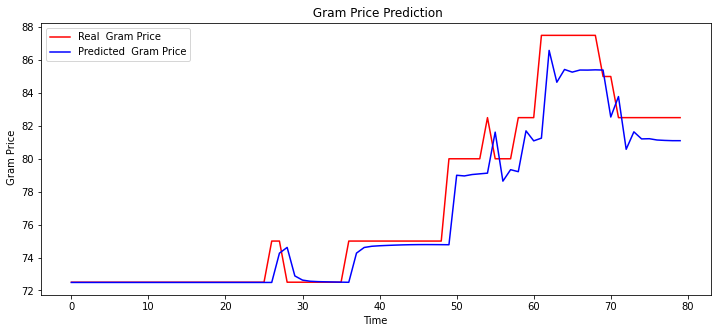

In [155]:
plt.plot(original, color = 'red', label = 'Real  Gram Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Gram Price')
plt.title(' Gram Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Gram Price')
plt.legend()
plt.show()

In [156]:
mean_absolute_error(original, pred)

0.8721306800842286

In [157]:
mean_squared_error(original, pred)

2.1718635055709457

In [158]:
rmse(pred, original)

1.473724365534799